<a href="https://colab.research.google.com/github/Tomoki-Ishikura/lecture_infosys/blob/main/BasicOptim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

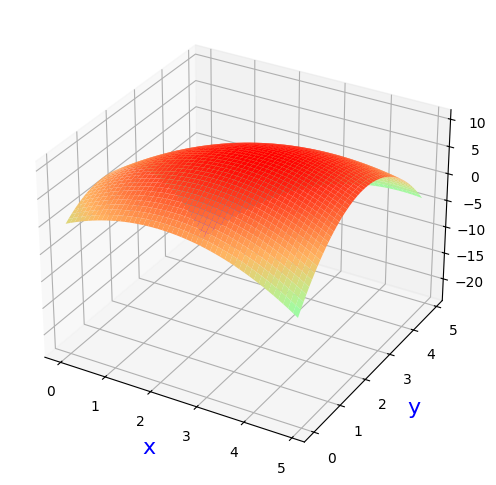

In [3]:
import os # 今回は不要なパッケージ
import numpy as np # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ作成ライブラリ


# Figureを作成
fig = plt.figure(figsize = (10, 6))

# FigureにAxes(軸)を追加
ax = fig.add_subplot(1,1,1, projection='3d')
# 軸ラベルを設定
ax.set_xlabel("x", size = 16, color = "blue")
ax.set_ylabel("y", size = 16, color = "blue")
ax.set_zlabel("F", size = 16, color = "blue")


x=np.arange(0,5,0.1)
# 0から4.9まで0.1間隔の50個の要素を持つアレイ（ベクトル）を作成
y=x # 同じサイズのアレイ（ベクトル）をコピーにより作成

# 格子点の作成
X, Y = np.meshgrid(x, y)

# 関数の計算式
F0 = -(X**2) -2* (Y**2) +4*X +5*Y + X*Y

# 曲面を描画(カラーマップは'plasma_r','hsv','magma'など)
ax.plot_surface(X, Y, F0, cmap = "rainbow")



<a list of 10 text.Text objects>

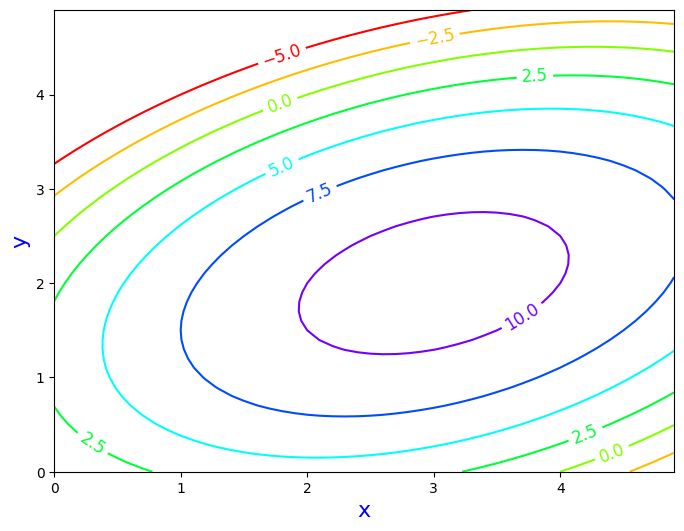

In [4]:
# Figure2を作成
fig2 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax2 = fig2.add_subplot()
# 軸ラベルを設定
ax2.set_xlabel("x", size = 16, color = "blue")
ax2.set_ylabel("y", size = 16, color = "blue")

# 等高線を描く高度
hight = [-5, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15]

# 等高線をプロット(カラーマップはhsv)
cont = ax2.contour(X, Y, F0, cmap = "hsv", levels = hight)

# 等高線ラベルを設定
ax2.clabel(cont, fontsize = 12)


In [8]:
"""
準備はここまで
初期点として，(x_0,y_0)を選んで，簡単なアルゴリズムにより最適点（関数の最大値を返す座標）を探す．
ステップ幅0.1の最急降下法
"""
N_Iteration=50 # 繰り返し計算の上限値
Record=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成

# Step 0
x=0
y=2.5
# このプログラムではkをIと表現しています

print('最急降下法：収束計算途中の(x, y, F)を画面出力させていきます')

for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    F = -(x**2) -2* (y**2) +4*x +5*y + x*y

    Record[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 勾配ベクトルの計算(解の更新方向）の計算
    dx= -2*x +4 + y
    dy=  -4*y +5 + x
    Grad=np.array((dx, dy)) # 勾配ベクトル
    # LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム
    Manual=np.sqrt(dx**2+dy**2) # 手計算で勾配ベクトルの長さを計算

    # Step 2.5 勾配ベクトルがゼロベクトルか判定
    if Manual<0.1: # 勾配ベクトルのノルムが0.1より小さければ，収束したと判断（実際にはもっと小さな値が望ましい）
      print('おめでとう! %d 回目で収束しました' % I)
      print('最適解と最適値は')
      print(Record[I,:])
      break
    else:
      print(Record[I,:])

    # 最急降下法のステップ幅 たとえば0.1
    step=0.15
    # Step 3 次の解候補（座標）を決める
    x=x+ step*dx
    y=y+ step*dy
# ここまでで，繰り返し計算は終了



最急降下法：収束計算途中の(x, y, F)を画面出力させていきます
[0.  2.5 0. ]
[0.975    1.75     7.280625]
[1.545      1.59625    9.14440313]
[1.9209375  1.62025    9.95697798]
[ 2.18769375  1.68624062 10.39813737]
[ 2.38432172  1.75265031 10.65086435]
[ 2.53192275  1.80870838 10.79725798]
[ 2.64365218  1.85327177 10.88224417]
[ 2.72854729  1.88785653 10.93160276]
[ 2.79316158  1.91442471 10.96027187]
[ 2.84237682  1.93474412 10.97692411]
[ 2.87987539  1.95025417 10.98659648]
[ 2.9084509   1.96208298 10.99221463]
[ 2.93022807  1.97110083 10.9954779 ]
おめでとう! 14 回目で収束しました
最適解と最適値は
[ 2.94682478  1.97797454 10.99737336]


<a list of 10 text.Text objects>

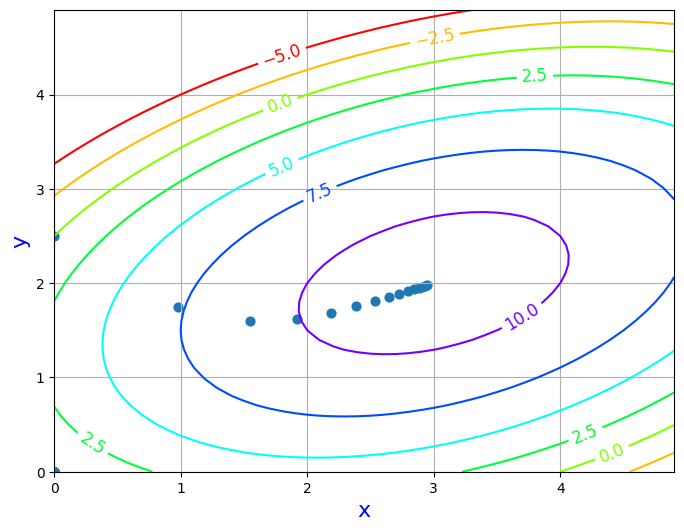

In [9]:
"""
このブロックは結果のまとめの図示
プロットは計算の経過を可視化するためなので，最適化計算には直接関係しません．
ですので，ここは実行しなくても計算結果に影響がありません．
"""

# 計算過程で保存しておいたx, y, Fの値をRecord変数から取り出す．
x_result=Record[:,0]
y_result=Record[:,1]
F_result=Record[:,2]

# グラフを表示する準備
fig3 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax3 = fig3.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax3.set_xlabel("x", size = 16, color = "blue")
ax3.set_ylabel("y", size = 16, color = "blue")

ax3.grid() # 罫線

Scat = ax3.scatter(x_result,y_result, s=40) # 繰り返し計算の軌跡
Cont2 = ax3.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線
# 等高線ラベルを設定
ax3.clabel(Cont2, fontsize = 12)


In [10]:
"""
ニュートン法の場合
初期点として，原点の(x_0,y_0)を選ぶ
"""
print('ニュートン法：収束計算途中の(x, y, F)を画面出力させていきます')

RecordNewton=np.zeros((N_Iteration,3)) # 途中の計算を記録する行列（要素は全て0）を作成


# Step 0
x=0
y=2.5

for I in range(N_Iteration):
    # Step 1 現在の解候補点での関数評価
    # # 関数の計算式
    F = -(x**2) -2* (y**2) +4*x +5*y + x*y

    RecordNewton[I,:]=[x,y,F] # 途中の計算結果を記録していく，(x,y)座標と，関数の評価値F

    # Step 2 降下方向（解の更新方向）の計算
    # Step 2-1勾配ベクトルの計算(偏微分)
    dx= -2*x +4 + y
    dy=  -4*y +5 + x
    Grad=np.array((dx, dy))

    # Step 2-2 二階微分の計算(行列)
    dxx = -2
    dyy = -4
    dxy = 1
    D2=[[dxx, dxy],[dxy,dyy]]

    # Step 2-3 Hesse行列の逆行列を計算，上の逆行列
    H=np.linalg.inv(D2)

    # Step 2.5 勾配ベクトルがゼロベクトルか判定
    LengVec=np.linalg.norm(Grad) # 勾配ベクトルの長さ：ノルム
    if LengVec<0.1: # 勾配ベクトルのノルムが0.1より小さければ，収束したと判断（実際にはもっと小さな値が望ましい）
      print('おめでとう! %d 回目で収束しました' % I)
      print('最適解と最適値は')
      print(RecordNewton[I,:])
      break
    else:
      print(RecordNewton[I,:])


    # Step 3 次の座標を決める
    Step=np.dot(H,Grad)
    x=x - Step[0]
    y=y - Step[1]
# ここまでで，繰り返し計算は終了

"""
2次関数の場合，Newton法を適用すると1回目の更新で計算が終了する．
（ヒント：微分すると1次関数になる）
"""


ニュートン法：収束計算途中の(x, y, F)を画面出力させていきます
[0.  2.5 0. ]
おめでとう! 1 回目で収束しました
最適解と最適値は
[ 3.  2. 11.]


'\n2次関数の場合，Newton法を適用すると1回目の更新で計算が終了する．\n（ヒント：微分すると1次関数になる）\n'

<a list of 10 text.Text objects>

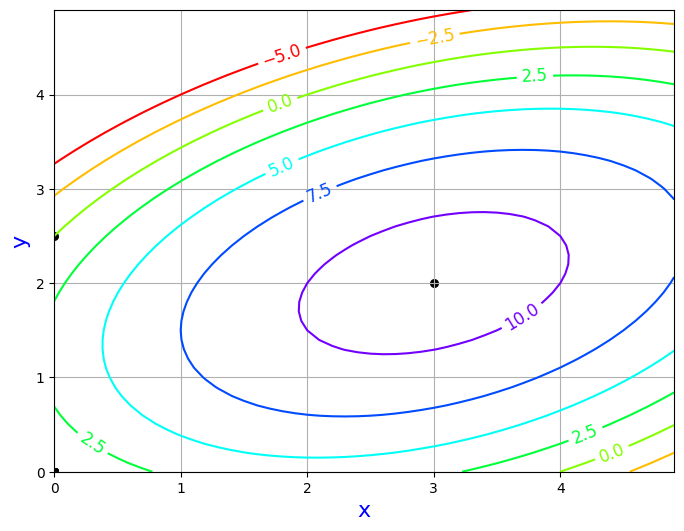

In [ ]:
# ここからNewton法の結果のまとめ
x_result2=RecordNewton[:,0]
y_result2=RecordNewton[:,1]
F_result2=RecordNewton[:,2]

# グラフを表示する準備
fig4 = plt.figure(figsize = (8, 6))

# FigureにAxes(軸)を追加
ax4 = fig4.add_subplot()
# 軸ラベルを設定，ラベルの文字とフォントサイズと色
ax4.set_xlabel("x", size = 16, color = "blue")
ax4.set_ylabel("y", size = 16, color = "blue")

ax4.grid() # 罫線

Scat2 = ax4.scatter(x_result2,y_result2,c='k', s=30) # 繰り返し計算の軌跡
Cont3 = ax4.contour(X, Y, F0, cmap = "hsv", levels = hight) # 関数の等高線
# 等高線ラベルを設定
ax4.clabel(Cont3, fontsize = 12)